## Лабораторна робота №1 
### Тема: Дослідження та візуалізація даних за допомогою Python
#### Мета: отримати базові навики використання Python для дослідження та візуалізації даних.

In [2]:
N = ord("R") % 3 + 1
print("Мій варіант: ", N)

filename = 'russia_losses_equipment.csv'

Мій варіант:  2


## Task 1
#### Створіть функцію, яка приймає назву файлу та назву стовпця як параметр і повертає масив numpy зі значеннями стовпця.

In [4]:
import numpy as np
import csv


def load_column(filename, column_name):
    with open(filename, newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        headers = next(reader)
        column_index = headers.index(column_name)
        return np.array([int(row[column_index]) for row in reader], dtype=int)

## Task 2
#### Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «tank».

In [6]:
tank = load_column(filename, 'tank')
print(tank)

[9868 9859 9852 ...  150  146   80]


## Task 3
#### Знайдіть добові втрати танків.

In [8]:
def calculate_daily_losses(tank_losses):
    return tank_losses[:-1] - tank_losses[1:]

daily_losses = calculate_daily_losses(tank)
print(daily_losses)

[ 9  7  2 ...  0  4 66]


## Task 4
#### Знайдіть 4 найбільші добові втрати танків.

In [10]:
def find_top_4_losses(daily_losses):
    top_indices = np.argsort(daily_losses)[-4:]
    return [daily_losses[i] for i in top_indices]

top4 = find_top_4_losses(daily_losses)

print(top4)

[44, 48, 55, 66]


## Task 5
#### Визначте, скільки танків було знищено навесні 2023 року.

In [12]:
from datetime import datetime

def load_dates(filename):
    with open(filename, newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)
        return np.array([datetime.strptime(row[0], '%Y-%m-%d') for row in reader])

def calculate_spring_losses(dates, tank_losses):
    #start_id = dates.index(datetime(2023, 3, 1))
    start_id = np.where(dates == datetime(2023, 3, 1))[0][0]
    end_id = np.where(dates == datetime(2023, 6, 1))[0][0]
    return(tank_losses[end_id] - tank_losses[start_id])

dates = load_dates(filename)
spring_losses = calculate_spring_losses(dates, tank)
print(spring_losses)

409


## Task 6
#### Знайдіть середнє значення знищених танків за останні 100 днів війни.

In [14]:
def calculate_average_last_100_days(daily_losses):
    return np.mean(daily_losses[-100:])

last_100 = calculate_average_last_100_days(daily_losses)
print(last_100)

13.01


## Task 7
#### Створіть графік втрат танків за минулий рік (починаючи з останньої дати в наборі даних)

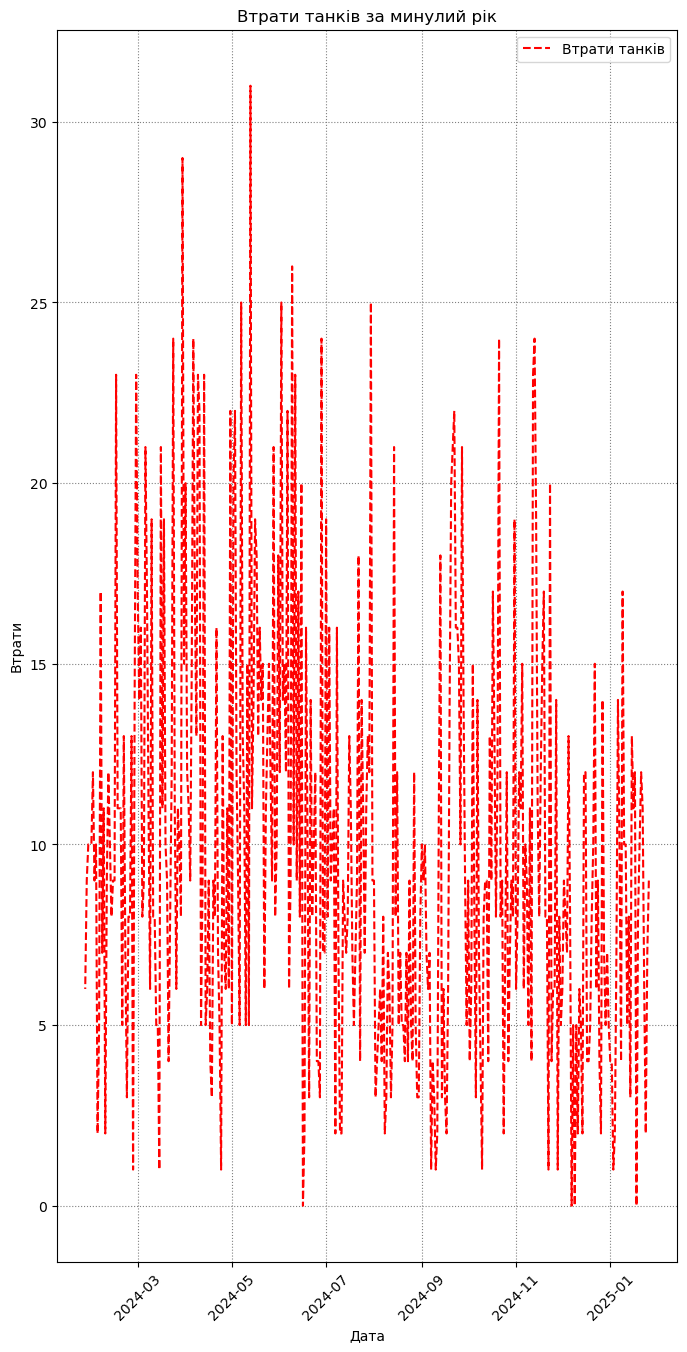

In [16]:
import matplotlib.pyplot as plt

def plot_tank_losses(dates, daily_losses):
    plt.figure(figsize=(8, 16), dpi=100)
    plt.plot(dates[:366], daily_losses[:366], linestyle='--', color='r', label='Втрати танків')
    plt.title('Втрати танків за минулий рік')
    plt.xlabel('Дата')
    plt.ylabel('Втрати')
    plt.grid(True, linestyle=':', color='gray')
    plt.legend()
    plt.xticks(rotation=45)
    plt.savefig('tank_losses.png')
    plt.show()

plot_tank_losses(dates, daily_losses)

    